# Feature Selection

In [44]:
import numpy as np
import pandas as pd
import sklearn as sk
from random import *
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
df = pd.read_csv('ExportTrainingWithoutMonthsAndLowOdds.csv',error_bad_lines=False)
df=df.dropna (axis=0, how="any")

maintrain=df[[ 'Bet365HomeWinOdds', 'Bet365DrawOdds', 'Bet365AwayWinOdds',
       'RelativeHomeAway', 'RelativeHomeDraw', 'RelativeAwayDraw',
       'Ganiota', 'ProbaHome', 'ProbaAway', 'ProbaDraw', 'PureProbaHome',
       'PureProbaAway', 'PureProbaDraw', 
       'EncodingLeagueDivision', 'HomeLastRes', 'VisitorLastRes',
       'HomeWinStreak', 'AwayWinStreak', 'HomeTeamPoints',
       'AwayTeamPoints', 'HowMuchMaximumTeamPointsInLeague',
       'HowMuchMinimumTeamPointsInLeague', 'HomeTeamPointsAsHost',
       'AwayTeamPointsAsAway', 'HomeTeamGoalsAsHost', 'AwayTeamGoalsAsAway',
       'RelativeTeamPointsAsHostAsAway', 'RelativeTeamGoalsAsHostAsAway',
       'RelativeHomeTeamPoints', 'RelativeAwayTeamPoints',
       'RelativePointsDifference', 'SumHomeTeamGoals', 'SumAwayTeamGoals',
       'EatSumHomeTeamGoals', 'EatSumAwayTeamGoals', 'RelativeSumTeamGoals',
       'RelativeEatSumTeamGoals', 'PointsDifference', 'Month', 'Day']]
maintarget=df[['FullTimeResultID']]

ran=randint(10, 200)
x_train,x_test,y_train,y_test =  train_test_split(maintrain,maintarget,test_size=0.25,random_state=ran)
X=x_train
y=y_train

## RFE

In [46]:
estimator=LogisticRegression(multi_class='multinomial',solver='sag')
estimator2=DecisionTreeClassifier()
estimator3=RandomForestClassifier()

selector = RFE(estimator, 5 , step=1)
selector2 = RFE(estimator2, 5, step=1)
selector3 = RFE(estimator3, 5 , step=1)

selector = selector.fit(X, y.values.ravel())
selector2 = selector2.fit(X, y.values.ravel())
selector3 = selector3.fit(X, y.values.ravel())

rank=selector.ranking_
rank2=selector2.ranking_
rank3=selector3.ranking_

#### The features I'll use are:

In [47]:
for i in range (len (selector.support_)):
    if (rank[i]+rank2[i]+rank3[i]<40):
        print X.columns[i],"Rank:",rank[i],"Rank2:",rank2[i],"Rank3:",rank3[i]

Ganiota Rank: 3 Rank2: 1 Rank3: 7
PureProbaHome Rank: 1 Rank2: 10 Rank3: 1
PureProbaAway Rank: 1 Rank2: 15 Rank3: 1
PureProbaDraw Rank: 1 Rank2: 7 Rank3: 4
HowMuchMaximumTeamPointsInLeague Rank: 27 Rank2: 1 Rank3: 2
RelativeHomeTeamPoints Rank: 8 Rank2: 1 Rank3: 1
RelativeAwayTeamPoints Rank: 7 Rank2: 3 Rank3: 1
RelativePointsDifference Rank: 4 Rank2: 1 Rank3: 1
RelativeSumTeamGoals Rank: 22 Rank2: 5 Rank3: 5
RelativeEatSumTeamGoals Rank: 19 Rank2: 4 Rank3: 6


In [48]:
maintrain=df[[ 
       'Ganiota','PureProbaHome',
       'PureProbaAway', 'PureProbaDraw', 
        'HowMuchMaximumTeamPointsInLeague',
       'RelativeHomeTeamPoints', 'RelativeAwayTeamPoints',
       'RelativePointsDifference', 'RelativeSumTeamGoals',
        'EatSumHomeTeamGoals','RelativeEatSumTeamGoals']]
maintarget=df[['FullTimeResultID']]
X=maintrain
y=maintarget

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 7 (0.095032) RelativePointsDifference
2. feature 8 (0.093779) RelativeSumTeamGoals
3. feature 5 (0.093736) RelativeHomeTeamPoints
4. feature 2 (0.093706) PureProbaAway
5. feature 1 (0.093576) PureProbaHome
6. feature 10 (0.093369) RelativeEatSumTeamGoals
7. feature 4 (0.093044) HowMuchMaximumTeamPointsInLeague
8. feature 9 (0.093023) EatSumHomeTeamGoals
9. feature 6 (0.092897) RelativeAwayTeamPoints
10. feature 3 (0.081671) PureProbaDraw
11. feature 0 (0.076165) Ganiota


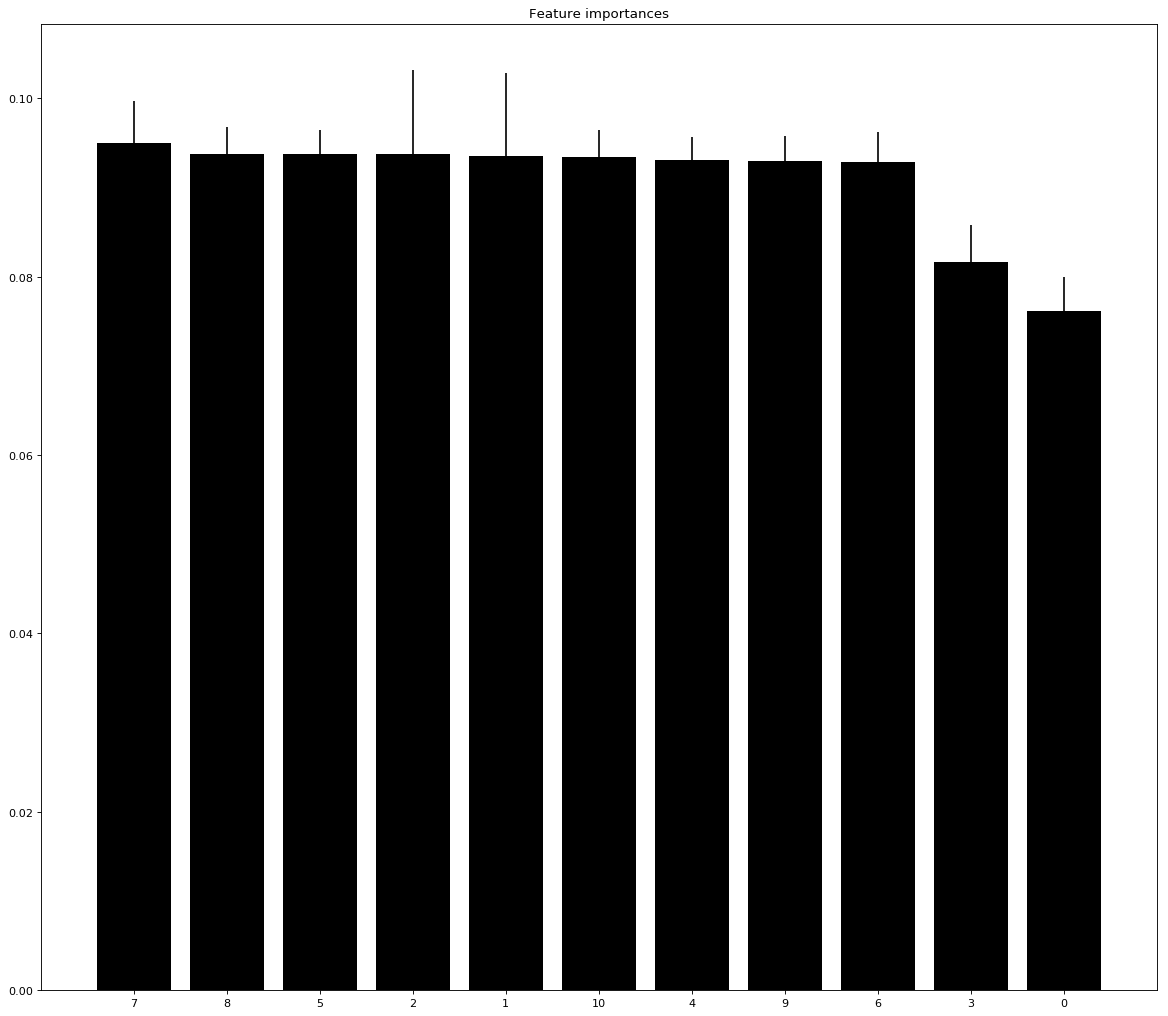

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
print(__doc__)

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y.values.ravel())
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print "%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),X.columns[indices[f]]
    
# Plot the feature importances of the forest
plt.figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='r')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="black", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [50]:
import winsound
winsound.Beep(300,2000)